# **Step 1: Install Required Libraries Use the following code to install libraries in Colab:**

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

# **Step 2: Import Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 3: Load the Dataset Upload the dataset or use a direct link to load it.**

In [3]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
df = pd.read_excel(url)

# Display the first few rows
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# **Step 4: Explore and Preprocess the Data.**

Missing values:
 Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

Dataset statistics:
        Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
m

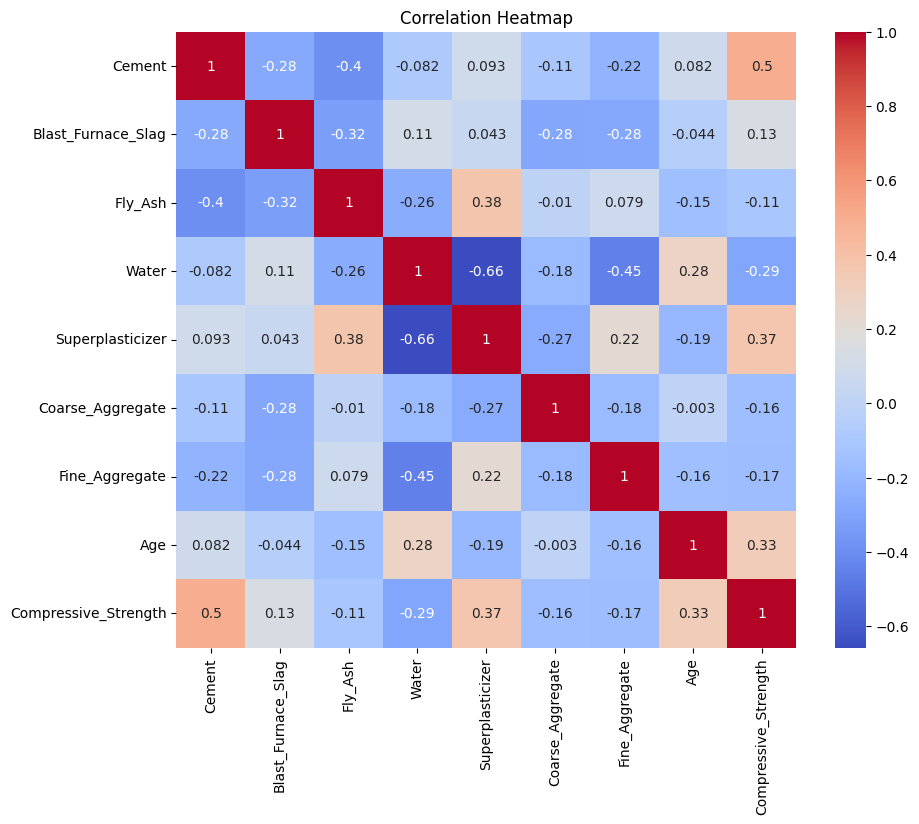

In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Basic statistics
print("\nDataset statistics:\n", df.describe())

# Rename columns for clarity
df.columns = [
    "Cement", "Blast_Furnace_Slag", "Fly_Ash", "Water", "Superplasticizer",
    "Coarse_Aggregate", "Fine_Aggregate", "Age", "Compressive_Strength"
]

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# **Step 5: Split the Data Divide the dataset into training and testing sets.**

In [5]:
# Features and target variable
X = df.drop("Compressive_Strength", axis=1)
y = df["Compressive_Strength"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 6: Scale the Features Normalize the feature values.**

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Step 6: Train a Random Forest Model Train a Random Forest Regressor and evaluate its performance.**

In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 30.43
R^2 Score: 0.88


# **Step 7: Visualize Results.**

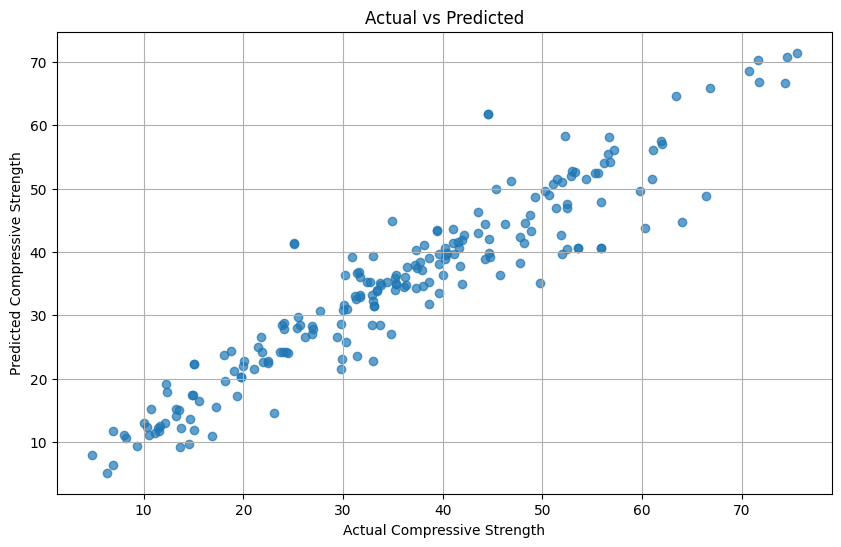

In [8]:
# Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Actual vs Predicted")
plt.grid()
plt.show()

# **Step 8: Save the trained model for future use.**

In [9]:
import joblib

# Save the model
joblib.dump(model, "concrete_strength_model.pkl")

# Load the model
loaded_model = joblib.load("concrete_strength_model.pkl")